> Anaísa Forti da Fonseca $\vert$ 11811ECP012

# **Derivadas de Funções**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

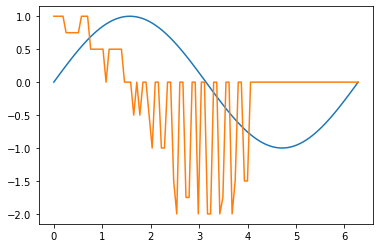

In [ ]:
def ddx(f, x0):
    h = np.finfo(float).eps
    return (f(x0 + h) - f(x0))/h

x = np.linspace(0, 2*np.pi, 100)
fx = lambda x: np.sin(x)
d_fx = ddx(fx, x)
plt.plot(x, fx(x), label="original")
plt.plot(x, d_fx, label="derivada")
plt.show()

In [ ]:
## EXERCÍCIO ##
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

N = 100
x = np.linspace(0., 1.5, N)
y = lambda x: 0.5 * (np.e)**(2*x) * ((3*np.cos(3*x)) - (2*np.sin(3*x)))

def ddx(f, x0):
    h = np.finfo(float).eps
    return (f(x0 + h) - f(x0))/h

derivadas = ddx(y,x)
soma = 0
for d in derivadas:
  soma += d
media = soma/(len(derivadas))
print("média: ", media)

média:  9.1240625


In [ ]:
@interact(max_x=(10, 1000, 10))
def estudo_eps(max_x=1000):
    def ddx(f, x0, alpha):
        h = alpha*np.finfo(float).eps
        return (f(x0 + h) - f(x0))/h

    fx = lambda x: x*np.exp(-x)*np.sin(x)
    dfx = lambda x: np.exp(-x)*(-x*np.sin(x) + np.sin(x) + x*np.cos(x))
    n = 1000
    err = np.zeros((n, ))
    x = 2
    for i in range(1, n):
        err[i] = abs(ddx(fx, x, i) - dfx(x))
    plt.plot(range(n), err)#, use_line_collection=True)
    plt.xlim([1, max_x])
    plt.grid('on')
    plt.show()

interactive(children=(IntSlider(value=1000, description='max_x', max=1000, min=10, step=10), Output()), _dom_c…

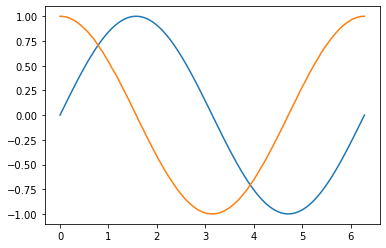

In [ ]:
def ddx(f, x0, alpha):
    h = alpha*np.finfo(float).eps
    return (f(x0 + h) - f(x0))/h

x = np.linspace(0, 2*np.pi, 100)
fx = lambda x: np.sin(x)
d_fx = ddx(fx, x, 128)
plt.plot(x, fx(x), label="original")
plt.plot(x, d_fx, label="derivada")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


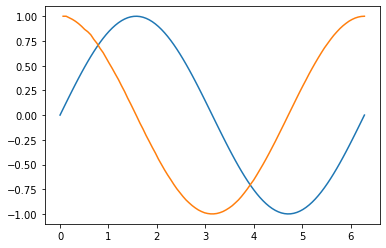

In [ ]:
def infinitesimal(fx, x0):
    ans = 1
    while fx(x0 + ans) != fx(x0):
        ans /= 2
    return ans

def ddx(f, x):
    d = np.zeros(x.shape)
    for i in range(d.shape[0]):
        h = 256*infinitesimal(f, x[i])
        d[i] = (f(x[i] + h) - f(x[i]))/h
    return d

x = np.linspace(0, 2*np.pi, 100)
fx = lambda x: np.sin(x)
d_fx = ddx(fx, x)
plt.plot(x, fx(x), label="original")
plt.plot(x, d_fx, label="derivada")
plt.show()

In [ ]:
def ddx(f, x0):
    h = 1e-9 # 1e-12
    return (f(x0 + h) - f(x0))/h

x = np.linspace(0, 2*np.pi, 100)
fx = lambda x: np.sin(x)
d_fx = ddx(fx, x, 16)
plt.plot(x, fx(x), label="original")
plt.plot(x, d_fx, label="derivada")
plt.grid('on')
plt.show()

TypeError: ignored

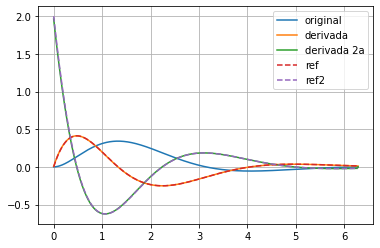

In [ ]:
def d_dx(y, x):
    # return (y[1:] - y[0:-1])/(x[1:]-x[0:-1])
    d = np.zeros(x.shape)
    d[:-1] = (y[1:] - y[0:-1])/(x[1:]-x[0:-1])
    d[-1] = d[-2]
    return d

x = np.linspace(0, 2*np.pi, 1000)
y = x*np.exp(-x)*np.sin(x) # não sabe sobre a função original
d_fx = d_dx(y, x)
dd_fx = d_dx(d_fx, x)
# ddd_fx = d_dx(dd_fx, x)
ref = np.exp(-x)*(-x*np.sin(x) + np.sin(x) + x*np.cos(x))
ref2 = -2*np.exp(-x)*(np.sin(x) + (x - 1)*np.cos(x))
plt.plot(x, y, label="original")
plt.plot(x, d_fx, label="derivada")
plt.plot(x, dd_fx, label="derivada 2a")
# plt.plot(x, ddd_fx, label="derivada 3a")
plt.plot(x, ref, '--', label="ref")
plt.plot(x, ref2, '--', label="ref2")
plt.legend()
plt.grid('on')
plt.show()


In [ ]:
## EXERCÍCIO ##
import os
if not os.path.exists('sinal_ex.npy'):
    !wget https://github.com/iperetta/FEELT31723/raw/main/sinal_ex.npy
import numpy as np
with open('sinal_ex.npy', 'rb') as f:
    y = np.load(f)
x = np.linspace(0., 1.5, y.shape[0])

def d_dx(y, x):
    # return (y[1:] - y[0:-1])/(x[1:]-x[0:-1])
    d = np.zeros(x.shape)
    d[:-1] = (y[1:] - y[0:-1])/(x[1:]-x[0:-1])
    d[-1] = d[-2]
    return d

derivadas = d_dx(y,x)
soma = 0
for d in derivadas:
  soma += d
media = soma/(len(derivadas))
print("média: ", media)

média:  6.0183326861336575


# **Integral de Funções**

In [ ]:
def integrate_lh(y, x):
    ans = 0
    for i in range(x.shape[0]-1):
        ans += y[i]*(x[i+1]-x[i])
    return ans

def integrate_rh(y, x):
    ans = 0
    for i in range(1, x.shape[0]):
        ans += y[i]*(x[i]-x[i-1])
    return ans

def integrate(y, x):
    return np.sum(y)*(x[1]-x[0])

def integrate_trap(y, x):
    ans = 0
    for i in range(x.shape[0]-1):
        ans += 0.5*(y[i+1]+y[i])*(x[i+1]-x[i])
    return ans

x = np.linspace(1e-9, np.pi, 100)
y = np.sin(x)/x
# 1.85194
a = integrate_lh(y, x)
b = integrate_rh(y, x)
print("Mão esquerda:", a)
print("Mão direita: ", b)
# print("Média: ", (a+b)/2)
print("Outra: ", integrate(y, x))
print("Trapézio: ", integrate_trap(y, x))

Mão esquerda: 1.8677769688676917
Mão direita:  1.8360437097506241
Outra:  1.867776968867692
Trapézio:  1.851910339309159


In [ ]:
## EXERCÍCIO ##
import os
if not os.path.exists('sinal_ex.npy'):
    !wget https://github.com/iperetta/FEELT31723/raw/main/sinal_ex.npy
import numpy as np
with open('sinal_ex.npy', 'rb') as f:
    y = np.load(f)
x = np.linspace(0., 1.5, y.shape[0])


def integrate_trap(y, x):
    ans = 0
    for i in range(x.shape[0]-1):
        ans += 0.5*(y[i+1]+y[i])*(x[i+1]-x[i])
    return ans
print("Trapézio: ", integrate_trap(y, x))

Trapézio:  -4.126024833680546


In [ ]:
## EXERCÍCIO ##
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

N = 10**6
x = np.linspace(0., 1.5, N)
fx = lambda x: 0.5 * (np.e)**(2*x) * ((3*np.cos(3*x)) - (2*np.sin(3*x)))

def integrate_trap(y, x):
    ans = 0
    for i in range(x.shape[0]-1):
        ans += 0.5*(y[i+1]+y[i])*(x[i+1]-x[i])
    return ans

integrate_trap(fx(x), x)

-6.191478773518085